# **Morphological Operators**

Morphological operators are sets of kernels that can achieve a variety of effects, such as reducing noise.

Some operators are very good at reducing black points on a white background. Some operators can also achieve an erosion and dilation effect that an add or erode from an existing image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def load_img():
    blank_img=np.zeros((600,600))
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50,300), fontFace=font, fontScale=5, color=(255,255,255),thickness=22)
    return blank_img

In [21]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

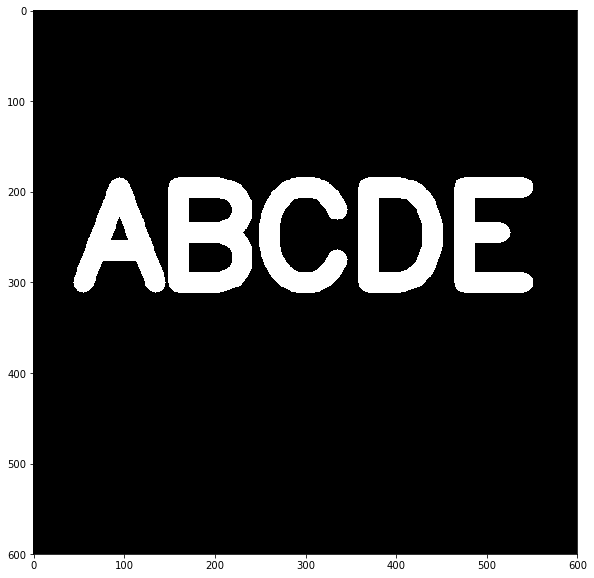

In [22]:
img=load_img()
display_img(img)

### **EROSION EFFECT:**

Let's try to define a kernel which detects the foreground edges and erodes the boundary between foreground and background.

In [23]:
kernel=np.ones((5,5),dtype=np.uint8)

In [24]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

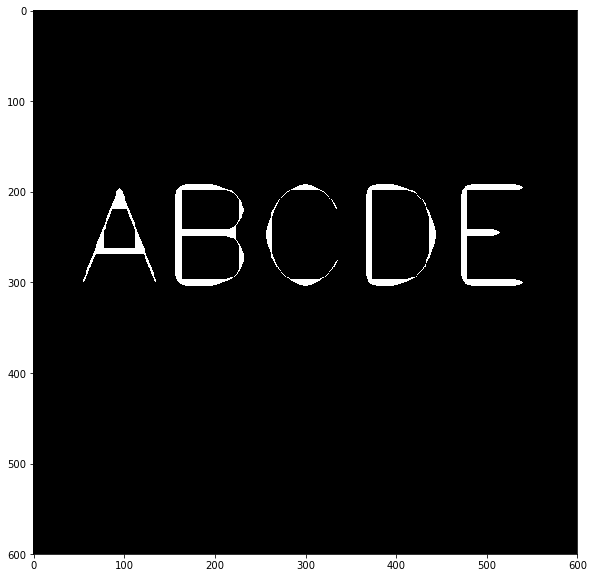

In [26]:
result=cv2.erode(img,kernel,iterations=4)
display_img(result)

### **OPENING EFFECT:**

* Opening effect --> Erosion followed by dilation
* Helps remove background noise

In [29]:
img=load_img()
white_noise=np.random.randint(low=0, high=2, size=(600,600)) #random array of 0 and 1s
white_noise

array([[0, 1, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0]])

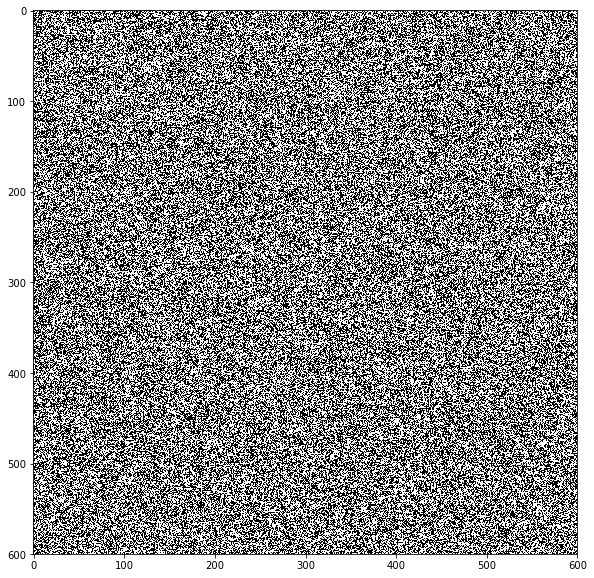

In [30]:
display_img(white_noise)

This image now needs to have value of 0 and 255 

In [31]:
white_noise=white_noise*255

In [32]:
white_noise

array([[  0, 255,   0, ...,   0, 255, 255],
       [  0,   0, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0, 255, ..., 255,   0,   0],
       [  0, 255, 255, ...,   0,   0, 255],
       [  0, 255,   0, ...,   0, 255,   0]])

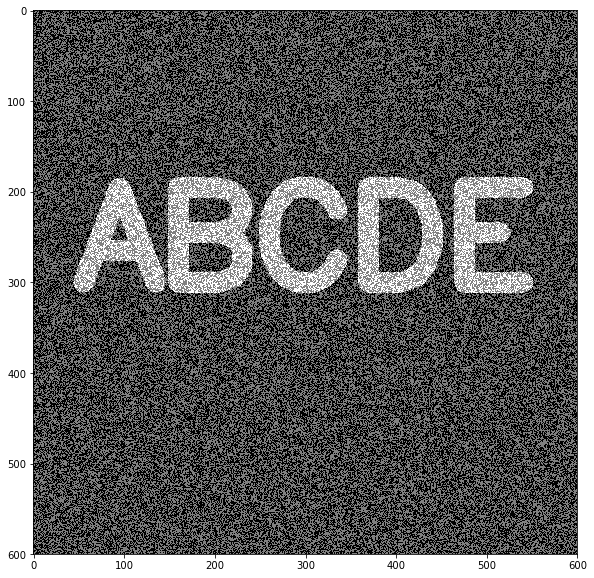

In [33]:
noise_img=white_noise+img
display_img(noise_img)

Now we'll use opening

In [34]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

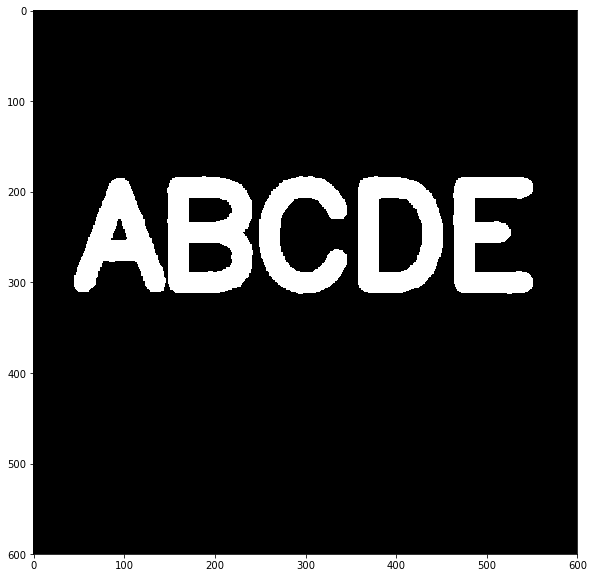

In [35]:
display_img(opening)

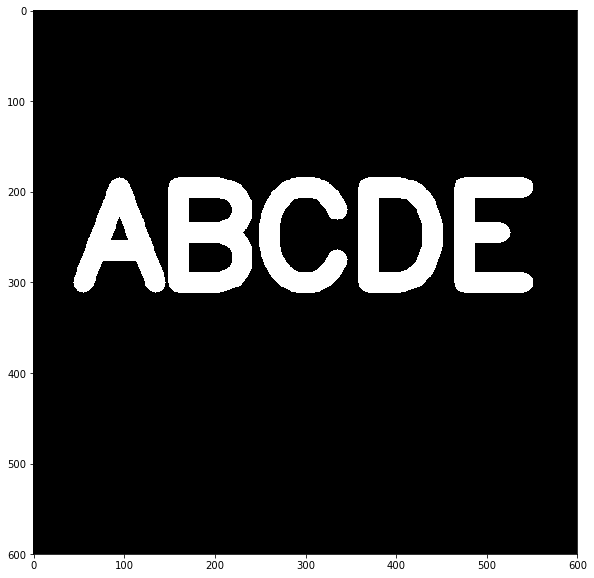

In [36]:
display_img(img)

The image obtained after opening is quiet close to the original

### Dealing with foreground noise: Closing 

In [38]:
# Let's create an image with foreground noise:
black_noise=np.random.randint(low=0, high=2, size=(600,600))

In [39]:
black_noise

array([[0, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 1, 1]])

In [40]:
black_noise=black_noise*-255

In [41]:
black_noise

array([[   0, -255, -255, ..., -255,    0, -255],
       [-255, -255, -255, ..., -255,    0,    0],
       [-255, -255, -255, ..., -255,    0, -255],
       ...,
       [   0, -255, -255, ...,    0, -255,    0],
       [-255,    0, -255, ..., -255, -255,    0],
       [-255,    0, -255, ...,    0, -255, -255]])

In [42]:
black_noise_img=img+black_noise

In [43]:
black_noise_img

array([[   0., -255., -255., ..., -255.,    0., -255.],
       [-255., -255., -255., ..., -255.,    0.,    0.],
       [-255., -255., -255., ..., -255.,    0., -255.],
       ...,
       [   0., -255., -255., ...,    0., -255.,    0.],
       [-255.,    0., -255., ..., -255., -255.,    0.],
       [-255.,    0., -255., ...,    0., -255., -255.]])

In [44]:
black_noise_img[black_noise_img==-255] = 0
black_noise_img.min()

0.0

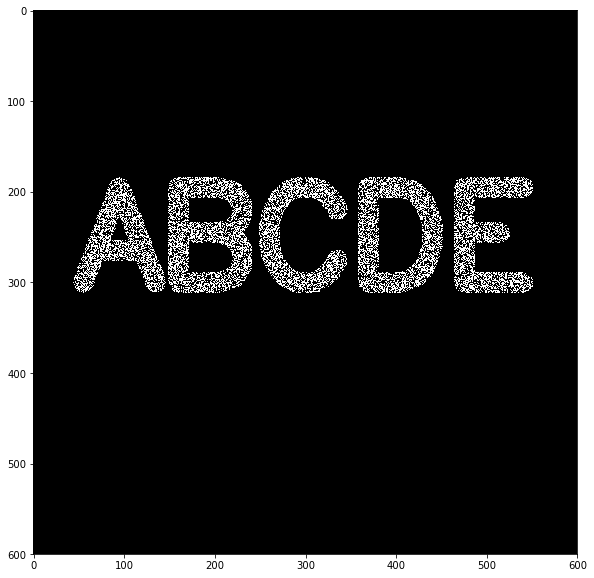

In [45]:
display_img(black_noise_img)

In [46]:
closing=cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

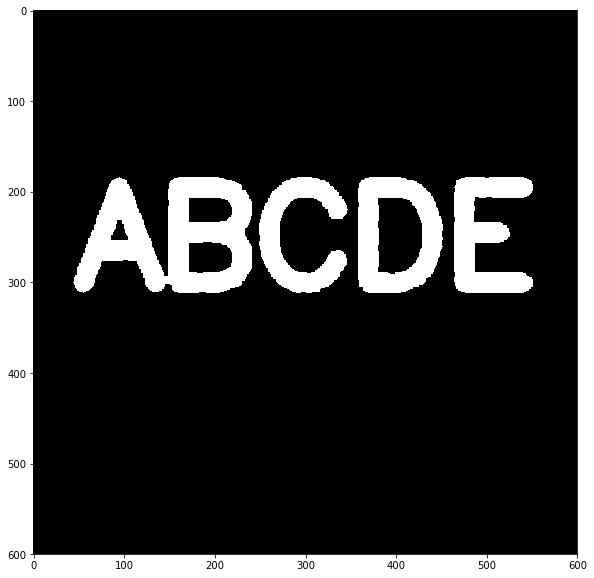

In [47]:
display_img(closing)

### Morphological Gradient: Difference between dilation and erosion of an image

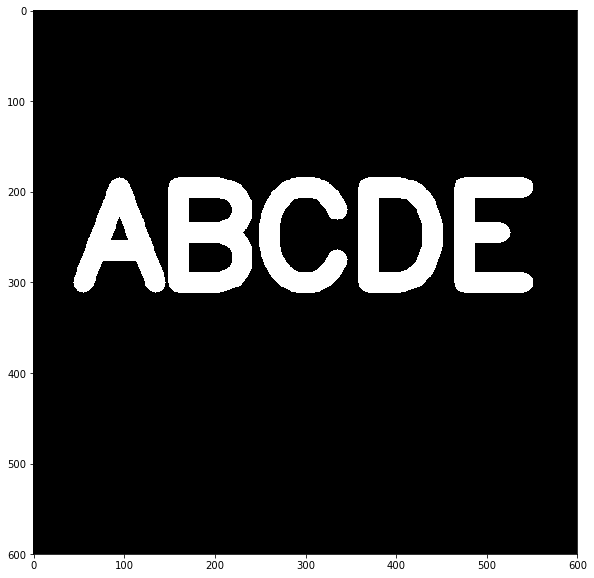

In [48]:
img=load_img()
display_img(img)

In [49]:
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

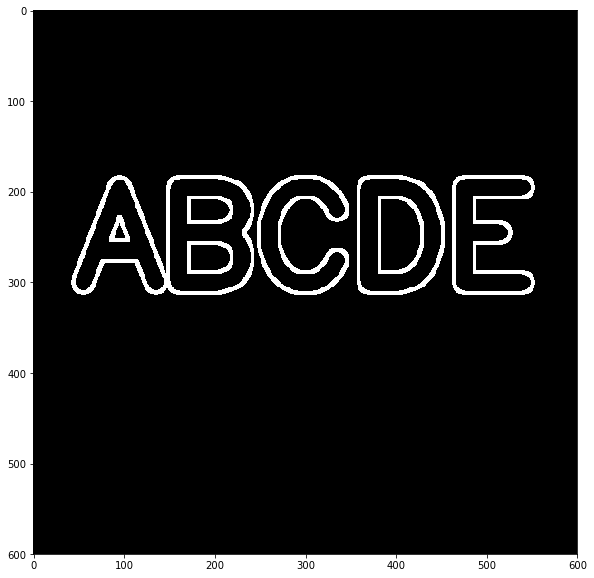

In [50]:
display_img(gradient)

This is mainly used for edge detection. This is what difference of dilation and erosion would look like.